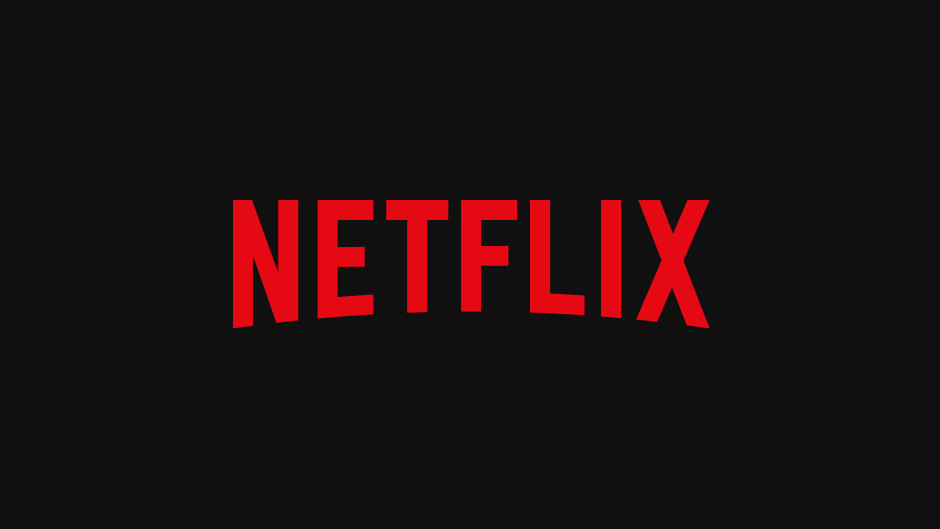



A Netflix recommendation system suggests movies or TV shows to users based on various factors like their viewing history, preferences, and behavior. If you've implemented this using Flask, here's a high-level overview of how it might work


**Overview of Netflix Recommendation System **


**1.Data Collection:**

**User Data**: Information about users' viewing history, ratings, and preferences.
**Content Data**: Details about movies and TV shows such as genres, actors, and descriptions.


**2.Recommendation Algorithms:**

**Collaborative Filtering**: Suggests content based on similar users' preferences. Can be user-based (users with similar tastes) or item-based (similar items).

**Content-Based Filtering**: Recommends content based on the features of the items and users' preferences.
Hybrid Approaches: Combine collaborative and content-based methods for improved accuracy.

**3.Building the Model:**

**Data Preprocessing**: Clean and prepare the data for analysis.
Model Training: Use algorithms like Matrix Factorization (SVD, ALS) or deep learning models to generate recommendations.


**4.Flask Implementation:**

**Set Up Flask Application**: Create a Flask app to serve the recommendation system.
Routes and Endpoints: Define routes for user interactions, such as fetching recommendations or submitting ratings.
**Integration**: Connect the recommendation model to the Flask app to provide real-time recommendations.

In [71]:
!pip install plotly_express
#importing libraries
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [72]:
netflix_data = pd.read_csv('NetflixDataset.csv',encoding='latin-1', index_col = 'Title')
netflix_data.head(2)

,Genre,Tags,Languages,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,...,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,Summary,Series or Movie,IMDb Votes,Image
Title,,,,,,,,,,,,,,,,,,,,,
Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Lina Leandersson, Kåre Hedebrant, Per Ragnar, ...",R,7.9,...,57.0,"$21,22,065",12-Dec-08,04-03-2021,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,A med student with a supernatural gift tries t...,Series,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...
HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Cleo, Paddy Considine, Beanie Feldstein, Dónal...",R,5.8,...,NaN,"$70,632",08-May-20,04-03-2021,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,"When nerdy Johanna moves to London, things get...",Movie,2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...


In [78]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [73]:
# Display summary statistics for numerical columns
print(netflix_data.describe())


        IMDb Score  Awards Received  Awards Nominated For    IMDb Votes
count  9395.000000      5213.000000           6363.000000  9.393000e+03
mean      6.954902         9.725878             16.024674  5.992114e+04
std       0.899448        19.526363             32.215336  1.456879e+05
min       1.600000         1.000000              1.000000  5.000000e+00
25%       6.500000         1.000000              2.000000  9.740000e+02
50%       7.000000         4.000000              6.000000  6.602000e+03
75%       7.500000         9.000000             15.000000  5.096900e+04
max       9.700000       300.000000            386.000000  2.354197e+06


<ipython-input-74-98f2dc45b9a1>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




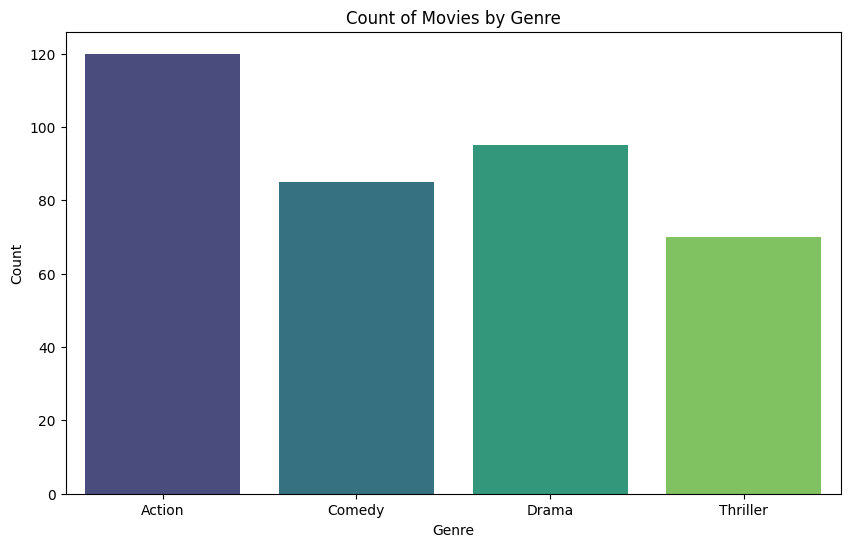

In [74]:
import seaborn as sns

# Sample DataFrame
data = {
    'Genre': ['Action', 'Comedy', 'Drama', 'Thriller'],
    'Count': [120, 85, 95, 70]
}
df = pd.DataFrame(data)

# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Genre', y='Count', data=df, palette='viridis')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Count of Movies by Genre')
plt.show()


In [75]:
netflix_data.index = netflix_data.index.str.title()

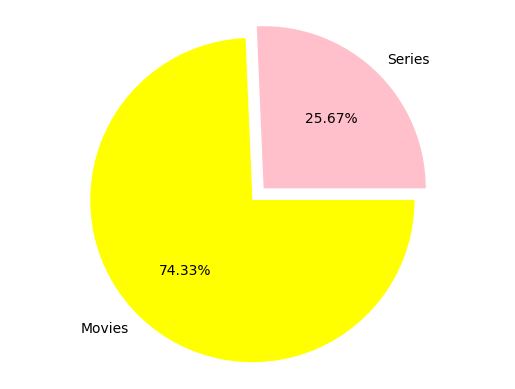

In [76]:
color = ['pink', 'yellow']
label = ['Series', 'Movies']
sizes = [netflix_data[netflix_data['Series or Movie'] == 'Series'].size, netflix_data[netflix_data['Series or Movie'] == 'Movie'].size]
explode = (0.1, 0)
fig, ax = plt.subplots()
ax.pie(sizes, explode, label, color, '%2.2f%%')
ax.axis('equal')
plt.show()

In [77]:
netflix_data.rename(columns={'View Rating':'ViewerRating'}, inplace=True)

In [44]:
Language = netflix_data.Languages.str.get_dummies(',')
Lang = Language.columns.str.strip().values.tolist()
Language = netflix_data['Languages']
Language_Count = dict()
for i in Lang:
    p = Language.str.count(i).sum()
    Language_Count[i] = int(p)
print(len(Language_Count))

184


In [45]:
Language_Count = {k: v for k, v in sorted(Language_Count.items(), key=lambda item: item[1], reverse = True)}
top_languages = {"Languages": list(Language_Count.keys()), "Count": list(Language_Count.values())}

In [46]:
fig = px.bar(pd.DataFrame(top_languages)[:10], y = 'Languages', x = 'Count', orientation = 'h', title = 'Most Available Languages', color = 'Count', color_continuous_scale = px.colors.qualitative.Prism).update_yaxes(categoryorder = 'total ascending')
fig.show()

In [47]:
Genres = netflix_data.Genre.str.get_dummies(',')
Genre = Genres.columns.str.strip().values.tolist()
Genres = netflix_data['Genre']
Genre_Count = dict()
for i in Genre:
    p = Genres.str.count(i).sum()
    Genre_Count[i] = int(p)
print(len(Genre_Count))

29


In [48]:
Genre_Count = {k: v for k, v in sorted(Genre_Count.items(), key=lambda item: item[1], reverse = True)}
top_genres = {"Genre": list(Genre_Count.keys()), "Count": list(Genre_Count.values())}

In [49]:
fig = px.bar(pd.DataFrame(top_genres)[:10], y = 'Genre', x = 'Count', orientation = 'h', title = 'Genres with maximum content', color = 'Count', color_continuous_scale = px.colors.qualitative.Prism).update_yaxes(categoryorder = 'total ascending')
fig.show()

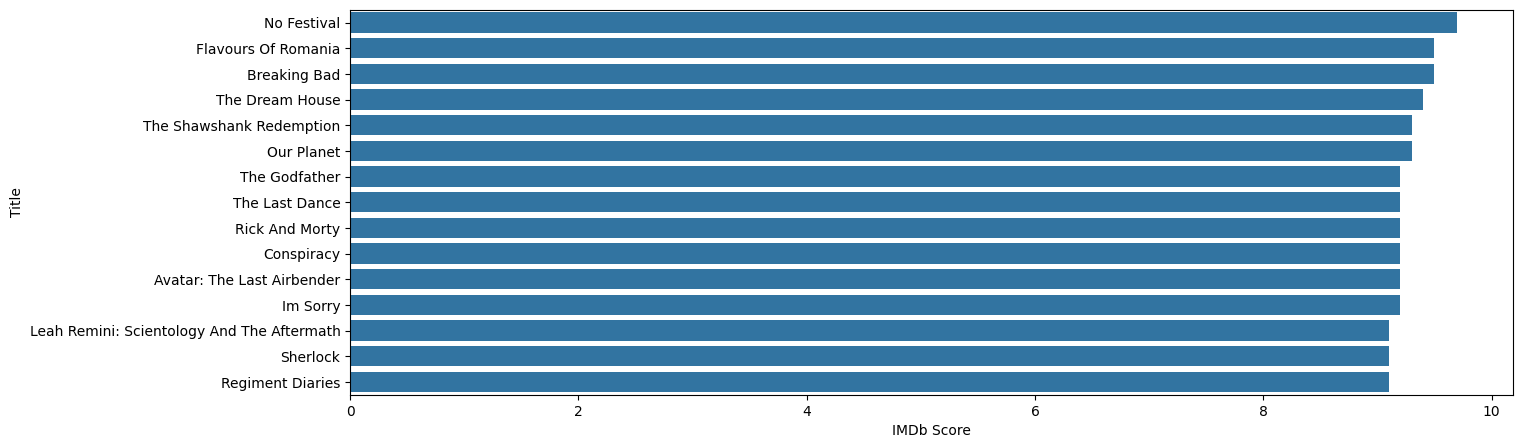

In [50]:
top_15 = netflix_data.sort_values(by = ['IMDb Score'], ascending = False).head(15)
plt.figure(figsize = (15,5))
sns.barplot(data = top_15, y = top_15.index, x = "IMDb Score")
plt.show()

In [51]:
netflix_data = netflix_data[~netflix_data.index.duplicated()]

In [52]:
netflix_data.index.duplicated().sum()

0

In [53]:
netflix_data.index.isnull().sum()

0

In [54]:
netflix_data['Genre'] = netflix_data['Genre'].astype('str')
print((netflix_data['Genre'] == 'nan').sum())

25


In [55]:
netflix_data['Tags'] = netflix_data['Tags'].astype('str')
print((netflix_data['Tags'] == 'nan').sum())

36


In [56]:
print(((netflix_data['Genre'] == 'nan') & (netflix_data['Tags'] == 'nan')).sum())
#so these two features can used to recommend movies as no movie can be left unrecommended

0


In [57]:
print(netflix_data[['IMDb Score']].describe())
netflix_data['IMDb Score'].mode()
#this feature will be used to sort the movie or series list to represent the recommended items

        IMDb Score
count  9132.000000
mean      6.954862
std       0.896212
min       1.600000
25%       6.500000
50%       7.000000
75%       7.500000
max       9.700000


,IMDb Score
0,6.6


In [58]:
netflix_data['IMDb Score'] = netflix_data['IMDb Score'].apply(lambda x: 6.6 if x == 0 or math.isnan(x) else x)
print(netflix_data[['IMDb Score']].describe())
#since no value has suffered for change greater than 0.0003 after replacing the null values with mode value, so we replace the null values with 6.6

        IMDb Score
count  9132.000000
mean      6.954862
std       0.896212
min       1.600000
25%       6.500000
50%       7.000000
75%       7.500000
max       9.700000


In [59]:
netflix_data['Actors'] = netflix_data['Actors'].astype('str')
netflix_data['ViewerRating'] = netflix_data['ViewerRating'].astype('str')

In [60]:
def prepare_data(x):
        return str.lower(x.replace(" ", ""))

In [61]:
new_features = ['Genre', 'Tags', 'Actors', 'ViewerRating']
selected_data = netflix_data[new_features]

In [62]:
for new_feature in new_features:
    selected_data.loc[:, new_feature] = selected_data.loc[:, new_feature].apply(prepare_data)
selected_data.index = selected_data.index.str.lower()
selected_data.index = selected_data.index.str.replace(" ",'')
selected_data.head(2)

,Genre,Tags,Actors,ViewerRating
Title,,,,
letsfightghost,"crime,drama,fantasy,horror,romance","comedyprogrammes,romantictvcomedies,horrorprog...","linaleandersson,kårehedebrant,perragnar,henrik...",r
howtobuildagirl,comedy,"dramas,comedies,filmsbasedonbooks,british","cleo,paddyconsidine,beaniefeldstein,dónalfinn",r


In [63]:
def create_soup(x):
    return x['Genre'] + ' ' + x['Tags'] + ' ' +x['Actors']+' '+ x['ViewerRating']

In [64]:
selected_data.loc[:, 'soup'] = selected_data.apply(create_soup, axis = 1)
selected_data.head(2)

<ipython-input-64-1b58fdfef02e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Genre,Tags,Actors,ViewerRating,soup
Title,,,,,
letsfightghost,"crime,drama,fantasy,horror,romance","comedyprogrammes,romantictvcomedies,horrorprog...","linaleandersson,kårehedebrant,perragnar,henrik...",r,"crime,drama,fantasy,horror,romance comedyprogr..."
howtobuildagirl,comedy,"dramas,comedies,filmsbasedonbooks,british","cleo,paddyconsidine,beaniefeldstein,dónalfinn",r,"comedy dramas,comedies,filmsbasedonbooks,briti..."


In [65]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(selected_data['soup'])
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [66]:
selected_data.reset_index(inplace = True)
selected_data.head(2)

,Title,Genre,Tags,Actors,ViewerRating,soup
0,letsfightghost,"crime,drama,fantasy,horror,romance","comedyprogrammes,romantictvcomedies,horrorprog...","linaleandersson,kårehedebrant,perragnar,henrik...",r,"crime,drama,fantasy,horror,romance comedyprogr..."
1,howtobuildagirl,comedy,"dramas,comedies,filmsbasedonbooks,british","cleo,paddyconsidine,beaniefeldstein,dónalfinn",r,"comedy dramas,comedies,filmsbasedonbooks,briti..."


In [67]:
indices = pd.Series(selected_data.index, index=selected_data['Title'])
indices

,0
Title,
letsfightghost,0
howtobuildagirl,1
thecon-heartist,2
glebokawoda,3
onlyamother,4
snowroller,5
theinvisible,6
thesimplemindedmurderer,7
tokillachild,8


In [68]:
result = 0
def get_recommendations(title, cosine_sim):
    global result
    title=title.replace(' ','').lower()
    idx = indices[title]
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores of the 50 most similar movies
    sim_scores = sim_scores[1:51]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar movies
    result =  netflix_data.iloc[movie_indices]
    result.reset_index(inplace = True)
    return result

In [69]:
df = pd.DataFrame()
movienames = ['Annabelle Comes Home','The Nun', 'Insidious: The Last Key', 'Conjuring 2', 'Insidious: Chapter 3']
languages = ['English', 'Hindi']
for moviename in movienames:
    get_recommendations(moviename,cosine_sim2)
    for language in languages:
        df = pd.concat([result[result['Languages'].str.count(language) > 0], df], ignore_index=True)
df.drop_duplicates(keep = 'first', inplace = True)
df.sort_values(by = 'IMDb Score', ascending = False, inplace = True)

In [70]:
print(df.shape)
print(df.head())

(118, 22)
             Title                             Genre  \
114     The Others         Horror, Mystery, Thriller   
50   The Conjuring         Horror, Mystery, Thriller   
169     Hereditary  Drama, Horror, Mystery, Thriller   
105          Split                  Horror, Thriller   
201    Conjuring 2         Horror, Mystery, Thriller   

                                                  Tags         Languages  \
114  20th Century Period Pieces,Thrillers,Mysteries...           English   
50   Horror Films,Thrillers,Supernatural Horror Fil...    English, Latin   
169  Supernatural Horror Movies,Horror Movies,Teen ...  English, Spanish   
105  Psychological Thrillers,Horror Movies,Thriller...           English   
201  Horror Films,Supernatural Horror Films,Films B...           English   

                                  Country Availability   Runtime  \
114  Italy,Sweden,Switzerland,Turkey,Iceland,India,...  1-2 hour   
50   France,Belgium,Lithuania,Switzerland,United Ki...  1-2 